In [1]:
import pandas as pd

# 8. 时间序列

## 8.1 转化为时间戳

读取数据，给定列名

In [3]:
popcon = pd.read_csv('data/popularity-contest', sep=' ', )[:-1]#读取数据，去除最后一列
popcon.columns = ['atime', 'ctime', 'package-name', 'mru-program', 'tag']#重新给定列名
popcon.head()

,atime,ctime,package-name,mru-program,tag
0,1387295797,1367633260,perl-base,/usr/bin/perl,NaN
1,1387295796,1354370480,login,/bin/su,NaN
2,1387295743,1354341275,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,1387295743,1387224204,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,1387295742,1354341253,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


前两列分别是改动时间和创建时间

In [4]:
popcon['atime'] = pd.to_datetime(popcon['atime'], unit='s')
popcon['ctime'] = pd.to_datetime(popcon['ctime'], unit='s')
popcon.head()

,atime,ctime,package-name,mru-program,tag
0,2013-12-17 15:56:37,2013-05-04 02:07:40,perl-base,/usr/bin/perl,NaN
1,2013-12-17 15:56:36,2012-12-01 14:01:20,login,/bin/su,NaN
2,2013-12-17 15:55:43,2012-12-01 05:54:35,libtalloc2,/usr/lib/x86_64-linux-gnu/libtalloc.so.2.0.7,NaN
3,2013-12-17 15:55:43,2013-12-16 20:03:24,libwbclient0,/usr/lib/x86_64-linux-gnu/libwbclient.so.0,<RECENT-CTIME>
4,2013-12-17 15:55:42,2012-12-01 05:54:13,libselinux1,/lib/x86_64-linux-gnu/libselinux.so.1,NaN


In [5]:
popcon['atime'].dtype

dtype('<M8[ns]')

## 8.2 根据时间筛选数据

另外一个操作是，我们需要按照时间去筛选数据，这个也很简单，你只需要告诉pandas，我需要大于/小于某个日期的数据

In [ ]:
popcon = popcon[popcon['atime'] > '1970-01-01']#将1970年的数据进行剔除

In [ ]:
nonlibraries = popcon[popcon['package-name'].str.contains('lib')]#在'package-name'列中包含‘lib’所对应的记录

In [ ]:
nonlibraries.sort_values('ctime', ascending=False)[:10]#根据ctime进行降序排列，取topN

关于Pandas的时间序列更多方法可以阅读下面博客：
+ [时间序列学习笔记1](http://www.cnblogs.com/felo/p/6411610.html)
+ [时间序列学习笔记2](http://www.cnblogs.com/felo/p/6412910.html)
+ [时间序列学习笔记3](http://www.cnblogs.com/felo/p/6421795.html)
+ [时间序列学习笔记4](http://www.cnblogs.com/felo/p/6426429.html)

# 9. 可视化的其他库

## 9.1 pyecharts

pyecharts 是一个用于生成 Echarts 图表的类库。Echarts 是百度开源的一个数据可视化 JS 库。用 Echarts 生成的图可视化效果非常棒，pyecharts 是为了与 Python 进行对接，方便在 Python 中直接使用数据生成图。

中文版官方文档点击[这里](http://pyecharts.org/#/)。

**3d柱状图**

In [ ]:
from pyecharts import Bar3D

bar3d = Bar3D("3D 柱状图示例", width=1200, height=600)
x_axis = [
    "12a", "1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a",
    "12p", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p"]
y_axis = [
    "Saturday", "Friday", "Thursday", "Wednesday", "Tuesday", "Monday", "Sunday"]
data = [
    [0, 0, 5], [0, 1, 1], [0, 2, 0], [0, 3, 0], [0, 4, 0], [0, 5, 0],
    [0, 6, 0], [0, 7, 0], [0, 8, 0], [0, 9, 0], [0, 10, 0], [0, 11, 2],
    [0, 12, 4], [0, 13, 1], [0, 14, 1], [0, 15, 3], [0, 16, 4], [0, 17, 6],
    [0, 18, 4], [0, 19, 4], [0, 20, 3], [0, 21, 3], [0, 22, 2], [0, 23, 5],
    [1, 0, 7], [1, 1, 0], [1, 2, 0], [1, 3, 0], [1, 4, 0], [1, 5, 0],
    [1, 6, 0], [1, 7, 0], [1, 8, 0], [1, 9, 0], [1, 10, 5], [1, 11, 2],
    [1, 12, 2], [1, 13, 6], [1, 14, 9], [1, 15, 11], [1, 16, 6], [1, 17, 7],
    [1, 18, 8], [1, 19, 12], [1, 20, 5], [1, 21, 5], [1, 22, 7], [1, 23, 2],
    [2, 0, 1], [2, 1, 1], [2, 2, 0], [2, 3, 0], [2, 4, 0], [2, 5, 0],
    [2, 6, 0], [2, 7, 0], [2, 8, 0], [2, 9, 0], [2, 10, 3], [2, 11, 2],
    [2, 12, 1], [2, 13, 9], [2, 14, 8], [2, 15, 10], [2, 16, 6], [2, 17, 5],
    [2, 18, 5], [2, 19, 5], [2, 20, 7], [2, 21, 4], [2, 22, 2], [2, 23, 4],
    [3, 0, 7], [3, 1, 3], [3, 2, 0], [3, 3, 0], [3, 4, 0], [3, 5, 0],
    [3, 6, 0], [3, 7, 0], [3, 8, 1], [3, 9, 0], [3, 10, 5], [3, 11, 4],
    [3, 12, 7], [3, 13, 14], [3, 14, 13], [3, 15, 12], [3, 16, 9], [3, 17, 5],
    [3, 18, 5], [3, 19, 10], [3, 20, 6], [3, 21, 4], [3, 22, 4], [3, 23, 1],
    [4, 0, 1], [4, 1, 3], [4, 2, 0], [4, 3, 0], [4, 4, 0], [4, 5, 1],
    [4, 6, 0], [4, 7, 0], [4, 8, 0], [4, 9, 2], [4, 10, 4], [4, 11, 4],
    [4, 12, 2], [4, 13, 4], [4, 14, 4], [4, 15, 14], [4, 16, 12], [4, 17, 1],
    [4, 18, 8], [4, 19, 5], [4, 20, 3], [4, 21, 7], [4, 22, 3], [4, 23, 0],
    [5, 0, 2], [5, 1, 1], [5, 2, 0], [5, 3, 3], [5, 4, 0], [5, 5, 0],
    [5, 6, 0], [5, 7, 0], [5, 8, 2], [5, 9, 0], [5, 10, 4], [5, 11, 1],
    [5, 12, 5], [5, 13, 10], [5, 14, 5], [5, 15, 7], [5, 16, 11], [5, 17, 6],
    [5, 18, 0], [5, 19, 5], [5, 20, 3], [5, 21, 4], [5, 22, 2], [5, 23, 0],
    [6, 0, 1], [6, 1, 0], [6, 2, 0], [6, 3, 0], [6, 4, 0], [6, 5, 0],
    [6, 6, 0], [6, 7, 0], [6, 8, 0], [6, 9, 0], [6, 10, 1], [6, 11, 0],
    [6, 12, 2], [6, 13, 1], [6, 14, 3], [6, 15, 4], [6, 16, 0], [6, 17, 0],
    [6, 18, 0], [6, 19, 0], [6, 20, 1], [6, 21, 2], [6, 22, 2], [6, 23, 6]
    ]
range_color = ['#313695', '#4575b4', '#74add1', '#abd9e9', '#e0f3f8', '#ffffbf',
               '#fee090', '#fdae61', '#f46d43', '#d73027', '#a50026']
bar3d.add("", x_axis, y_axis, [[d[1], d[0], d[2]] for d in data],is_visualmap=True, visual_range=[0, 20],visual_range_color=range_color, 
          grid3d_width=200, grid3d_depth=80,grid3d_shading='lambert',is_grid3d_rotate=True, grid3d_rotate_speed=180)
bar3d.render('3d柱状图.html')

## 9.2 Seaborn

Seaborn是斯坦福大学出的一个非常好用的可视化包，是Python基于matplotlib的数据可视化工具。它提供了很多高层封装的函数，帮助数据分析人员快速绘制美观的数据图形，而避免了许多额外的参数配置问题。对于Seaborn入门级的实践用法可以参考[Seaborn绘图入门实践](https://zhuanlan.zhihu.com/p/29935747)。这里只介绍一些偏高级一点的用法。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

先用pandas读进来一份数据,进行简单的数据处理。

In [2]:
names = ['mpg','cylinders','displacement','horsepower','weight','acceleration','model_year','origin','car_name']
df = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep='\s+', names=names)
df['maker'] = df.car_name.apply(lambda x: x.split()[0]).str.title()
df['origin'] = df.origin.map({1: 'America', 2: 'Europe', 3: 'Asia'})
df=df.applymap(lambda x: np.nan if x == '?' else x).dropna()
df['horsepower'] = df.horsepower.astype(float)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,maker
0,18.0,8,307.0,130.0,3504.0,12.0,70,America,chevrolet chevelle malibu,Chevrolet
1,15.0,8,350.0,165.0,3693.0,11.5,70,America,buick skylark 320,Buick
2,18.0,8,318.0,150.0,3436.0,11.0,70,America,plymouth satellite,Plymouth
3,16.0,8,304.0,150.0,3433.0,12.0,70,America,amc rebel sst,Amc
4,17.0,8,302.0,140.0,3449.0,10.5,70,America,ford torino,Ford


### 9.3.1 一般绘图：factorplot 和 FacetGrid

** (1) 根据两个维度变量绘图 **

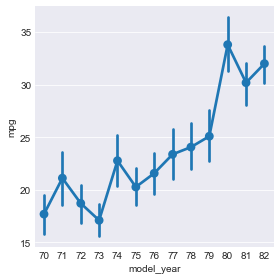

In [3]:
# 画出model_year和mpg的关系图
sns.factorplot(data=df, x="model_year", y="mpg")

** (2) 根据三个维度变量绘图 **

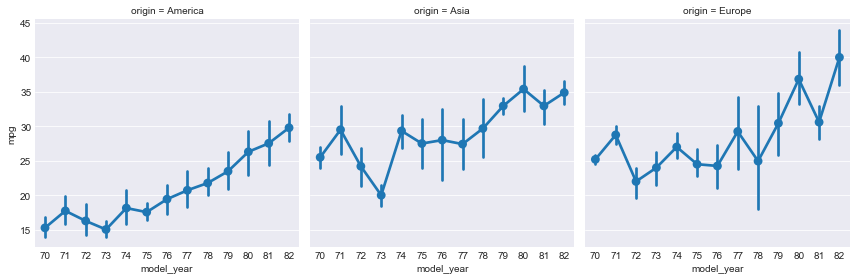

In [4]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin")

** (3) 从折线图切成柱状图 **

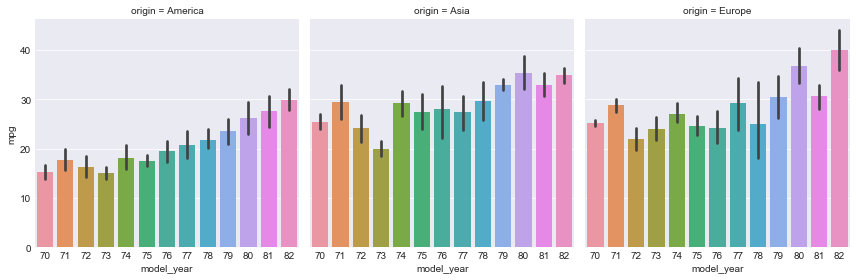

In [5]:
sns.factorplot(data=df, x="model_year", y="mpg", col="origin",kind='bar')

d:\program files\python3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


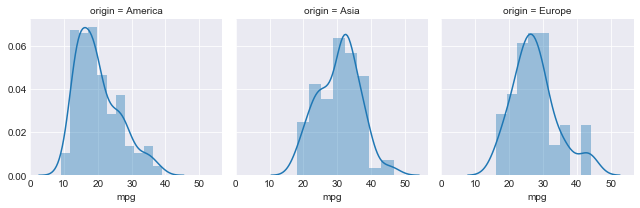

In [6]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.distplot, "mpg")

** (4) 散点图 **

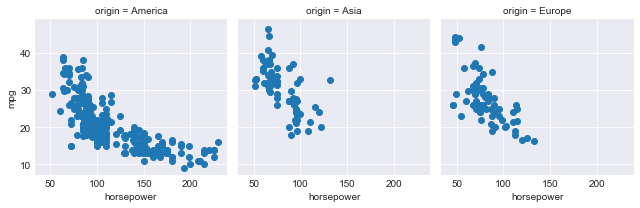

In [7]:
g = sns.FacetGrid(df, col="origin")
g.map(plt.scatter, "horsepower", "mpg")

** (5) 绘图的同时还做回归 **

(0, 60)

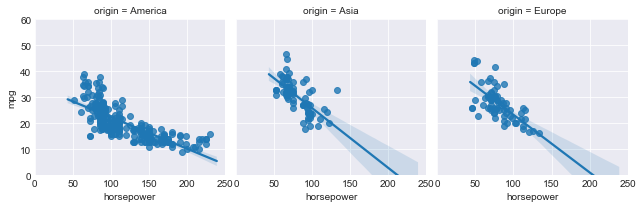

In [8]:
g = sns.FacetGrid(df, col="origin")
g.map(sns.regplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

** (6) kde等高线图 **

d:\program files\python3.6\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'color'
  s)


(0, 60)

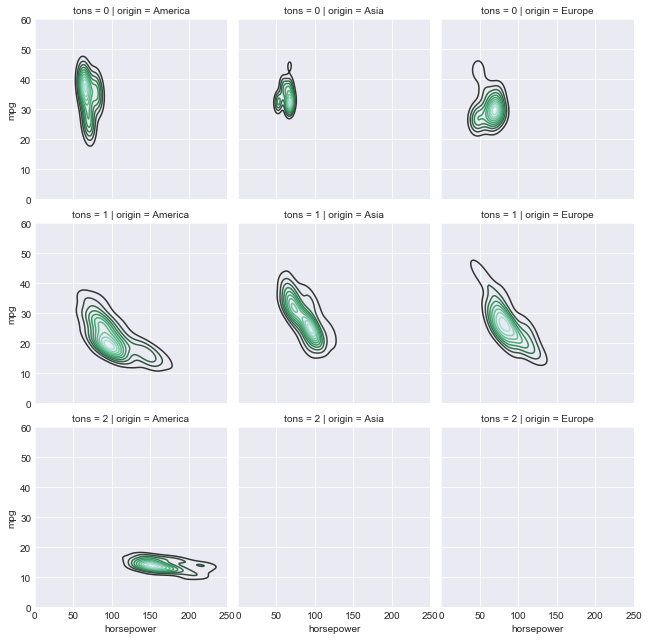

In [9]:
df['tons'] = (df.weight/2000).astype(int)
g = sns.FacetGrid(df, col="origin", row="tons")
g.map(sns.kdeplot, "horsepower", "mpg")
plt.xlim(0, 250)
plt.ylim(0, 60)

** (9) 按照2个维度展开画图**

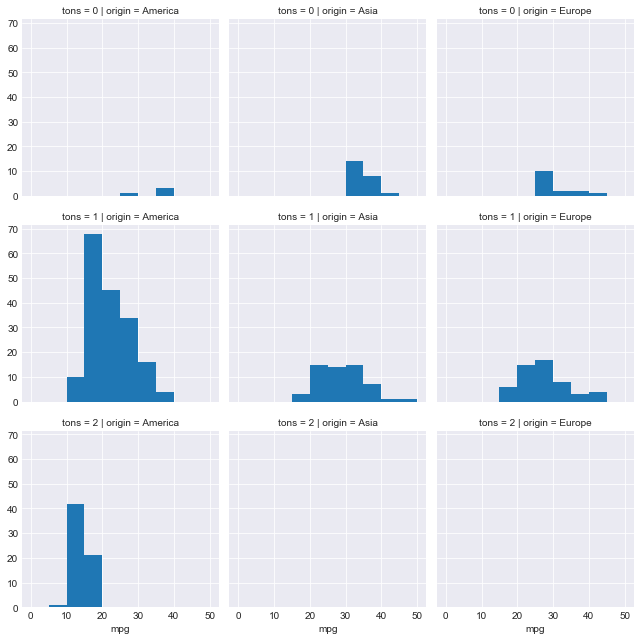

In [10]:
g = sns.FacetGrid(df, col="origin", row="tons")
g.map(plt.hist, "mpg", bins=np.linspace(0, 50, 11))

### 9.3.2 pairplot and PairGrid

** (1) 多个维度两两组合绘图**

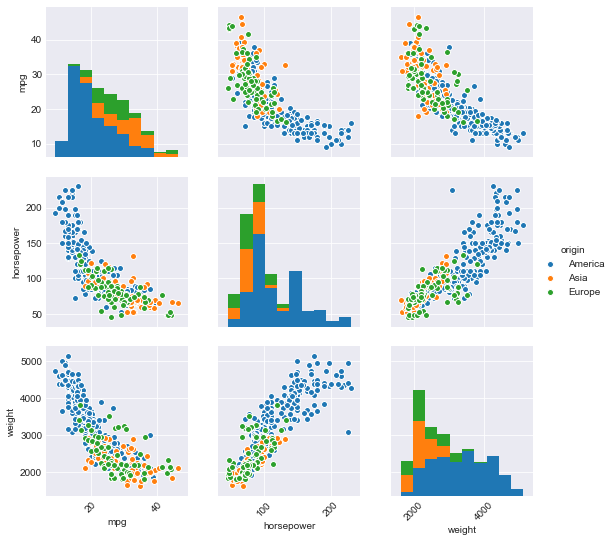

In [11]:
g = sns.pairplot(df[["mpg", "horsepower", "weight", "origin"]], hue="origin", diag_kind="hist")
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)

** (2) 组合绘图的时候顺便回归一下**

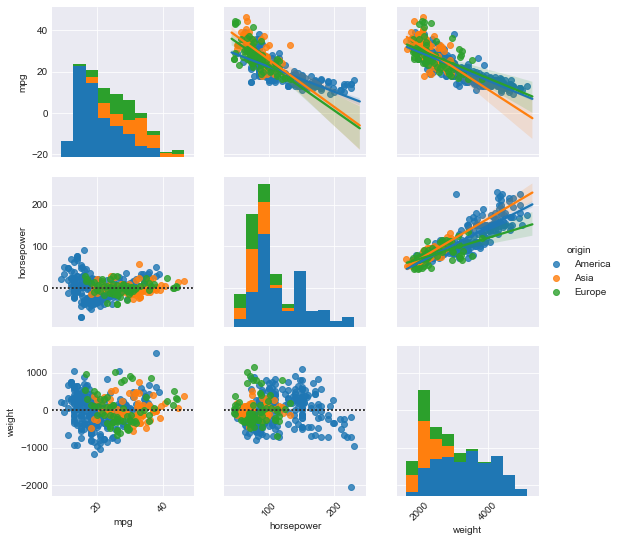

In [12]:
g = sns.PairGrid(df[["mpg", "horsepower", "weight", "origin"]], hue="origin")
g.map_upper(sns.regplot)
g.map_lower(sns.residplot)
g.map_diag(plt.hist)
for ax in g.axes.flat:
    plt.setp(ax.get_xticklabels(), rotation=45)
g.add_legend()
g.set(alpha=0.5)

### 9.3.3 jointplot and JointGrid

**(1) 联合绘图(kde等高)**

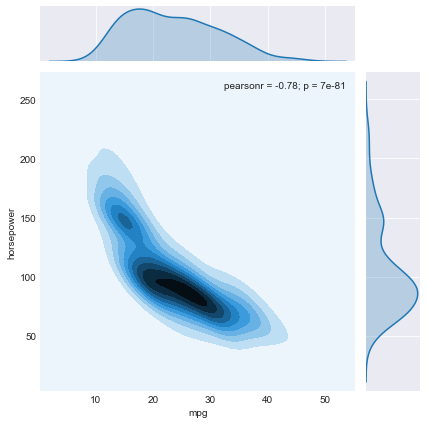

In [13]:
sns.jointplot("mpg", "horsepower", data=df, kind='kde')

**(2) 联合绘图(加回归)**

d:\program files\python3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


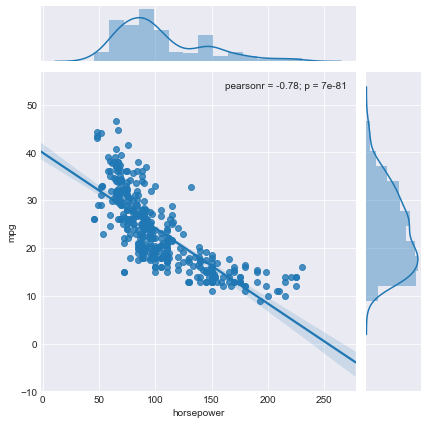

In [14]:
sns.jointplot("horsepower", "mpg", data=df, kind="reg")

d:\program files\python3.6\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


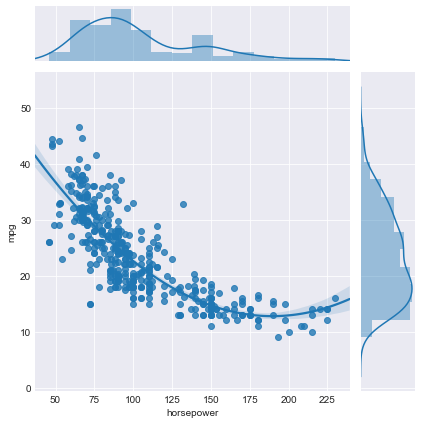

In [15]:
g = sns.JointGrid(x="horsepower", y="mpg", data=df)
g.plot_joint(sns.regplot, order=2)
g.plot_marginals(sns.distplot)

更多方法参考[官方文档](http://seaborn.pydata.org/api.html)。